# **Clasificador de Bayes ingenuo**
- Deteccion de mensajes spam o no spam (ham)

##**1. Importación de librerias**
- **pandas.** Utilizado para cargar el conjunto de datos
- **numpy.** Para el cálculo numérico, arays, el motor que facilita operaciones matemáticas y estadísticas  en Python
- **train_test_split.** Entrenamiento de los datos
- **CountVectorizer.** Convierte una colección de documentos de texto en una matríz de características numéricas
- **MultinomialNB.** Implementación del clasificador Naive Bayes multinomial,
- **accuracy_score.** Mide la proporción de predicciones correctas en comparación con el total de predicciones.
- **recall_score.** Mide la sensibilidad o tasa de verdaderos positivos. Indica qué tan bien el modelo detecta las instancias positivas (spam).
- **precision_score.** Mide la precisión o la tasa de aciertos de las predicciones positivas. Indica cuántos de los predichos como spam realmente son spam.
- **confusion_matrix.** Muestra una matriz de confusión
- **matplotlib.pyplot.** Una librería de Python utilizada para crear gráficos y visualizaciones.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt

##**2. Data set**
Cargando el data set de UC Irvine Machine Learning Repository con el nombre de **SMS Spam Collection.**
- https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [ ]:
# Cargar el dataset de mensajes
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INF354-Inteligencia Artificial/Exposicion/datasets/SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])

# Visualizar las primeras filas
print(data.head())

# Asumimos que el dataset tiene dos columnas: 'text' y 'label'
# 'text' es el mensaje y 'label' es 1 para spam y 0 para no spam
X = data['message']  # Los mensajes de texto
y = data['label']  # Las etiquetas de spam (1) y no spam (0)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


##**2. Conversión de datos**
**CountVectorizer.** Convertimos el texto de los mensajes texto en una matriz dispersa donde:
- Cada fila corresponde un mensaje
- Cada columna corresponde a una palabra del vocabulario.

**stop_words='english'.** Elimina las palabras comunes en inglés (como "the", "and", "is", etc.) ya que aportan valor significativo para la clasificación.

**fit_transform.** Ajuste de vectorizer al conjunto de datos de mensajes, luego lo convierte en vectores numéricos.

In [ ]:
# Convertir los mensajes de texto en vectores de características numéricas
vectorizer = CountVectorizer(stop_words='english')  # Quitamos las palabras comunes (stop words)
X_vectorized = vectorizer.fit_transform(X)

# Visualizamos las primeras 5 características (palabras)
print(vectorizer.get_feature_names_out()[:5])

['00' '000' '000pes' '008704050406' '0089']


##**3. Entrenamiento del modelo**
Entrena el modelo, evalua el rendimiento del modelo en datos no vistos (sobreajuste o overfitting).

- **test_size=0.3**. 30% Prueba y 70% Entrenamiento
- **random_state=42**. División de datos aleatorio.

In [ ]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

##**4. Clasificador de Bayes**
- **MultinomialNB().** crea una Instancia del clasificador Naive Bayes multinomial.
- **model.fit(X_train, y_train).** Entrena el modelo utilizando las características del conjunto de entrenamiento (X_train) y las etiquetas correspondientes (y_train), aprendiendo las probabilidades necesarias para clasificar los mensajes.

In [ ]:
# Entrenar el clasificador Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

##**5. Precisión y Evaluación del modelo**
- **model.predict(X_test).** Entrenamiendo del modelo con el conjunto de prueba (X_test)
- **accuracy_score.** Precisión o exactitud del mmodelo para predicciones correctas.
- **recall_score.** Recall o sensibilidad para la clase spam, cómo mide correctamente los mensajes spam
- **precision_score.** Precisión para etiquetar los mensajes no spam como spam.

In [ ]:
# Predicciones del modelo
y_pred = model.predict(X_test)

# Calcular precisión, recall y exactitud
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='spam')
precision = precision_score(y_test, y_pred, pos_label='spam')

# Mostrar resultados
print(f"Exactitud: {accuracy * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")


Exactitud: 98.09%
Recall: 95.54%
Precision: 90.68%


##**6. Matriz de confusión**
- **confusion_matrix(y_test, y_pred).** Calcula la matriz de confusión.

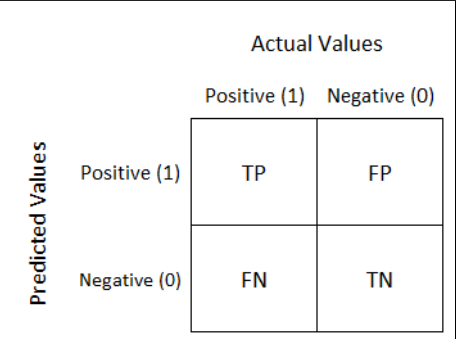

  - **TP. True Positive.** Los mensajes no spam correctamente identificados como no spam
  - **FP. False Positive.** Los mensajes no spam incorrectamente identificados como spam.
  - **FN. False Negative.** Los mensajes spam incorrectamente identificados como no spam.
  - **TN, True Negative.** Los mensajes spam correctamente identificados como spam.

In [ ]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(cm)


Matriz de confusión:
[[1426   22]
 [  10  214]]


##**7. Grafica de precision y recall (o sensibilida)**
- **labels.** Etiquetas de la grafica.
- **scores.** Métricas para mostrarlos a escala.
- **plt.bar().** Crea un gráfico de barras con las labels en el eje x y los scores (valores de precisión y recall) en el eje y.

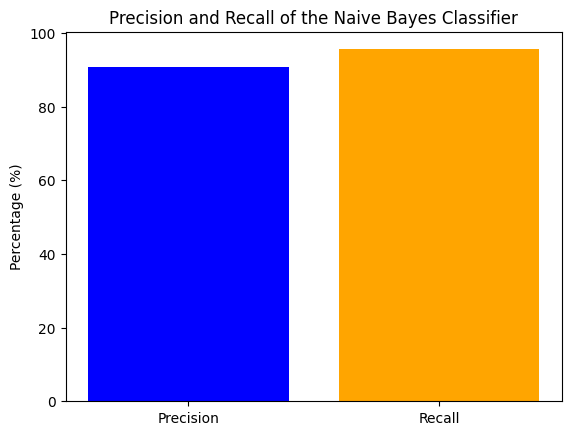

In [ ]:
# Graficar la precisión y recall
labels = ['Precision', 'Recall']
scores = [precision * 100, recall * 100]

plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylabel('Percentage (%)')
plt.title('Precision and Recall of the Naive Bayes Classifier')
plt.show()


# Codigo completo


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
['00' '000' '000pes' '008704050406' '0089']
Exactitud: 98.09%
Recall: 95.54%
Precision: 90.68%
Matriz de confusión:
[[1426   22]
 [  10  214]]


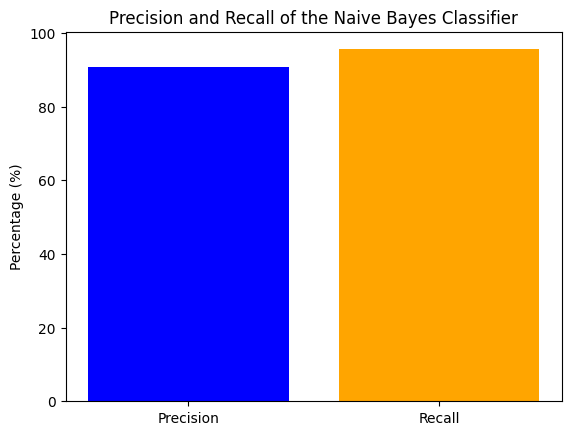

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
# Cargar el dataset de mensajes
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/INF354-Inteligencia Artificial/Exposicion/datasets/SMSSpamCollection", sep='\t', header=None, names=['label', 'message'])

# Visualizar las primeras filas
print(data.head())

# Asumimos que el dataset tiene dos columnas: 'text' y 'label'
# 'text' es el mensaje y 'label' es 1 para spam y 0 para no spam
X = data['message']  # Los mensajes de texto
y = data['label']  # Las etiquetas de spam (1) y no spam (0)
# Convertir los mensajes de texto en vectores de características numéricas
vectorizer = CountVectorizer(stop_words='english')  # Quitamos las palabras comunes (stop words)
X_vectorized = vectorizer.fit_transform(X)

# Visualizamos las primeras 5 características (palabras)
print(vectorizer.get_feature_names_out()[:5])
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)
# Entrenar el clasificador Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
# Predicciones del modelo
y_pred = model.predict(X_test)

# Calcular precisión, recall y exactitud
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='spam')
precision = precision_score(y_test, y_pred, pos_label='spam')

# Mostrar resultados
print(f"Exactitud: {accuracy * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(cm)

# Graficar la precisión y recall
labels = ['Precision', 'Recall']
scores = [precision * 100, recall * 100]

plt.bar(labels, scores, color=['blue', 'orange'])
plt.ylabel('Percentage (%)')
plt.title('Precision and Recall of the Naive Bayes Classifier')
plt.show()
